<a href="https://colab.research.google.com/github/swjh9523/Python_Tutorial/blob/master/Subway_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


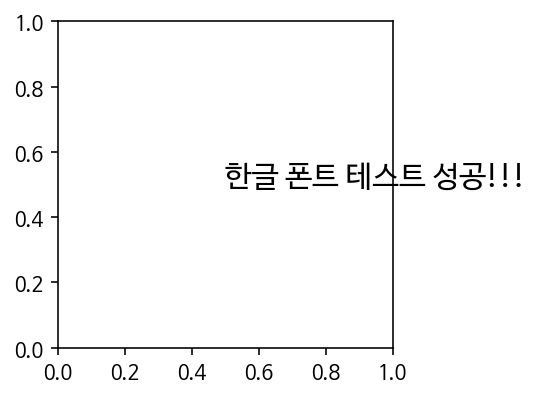

In [ ]:
# 최근 데이터 시각화하기
# 그래프 한글폰트 사용설정 in Colab
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

fontpath = '/content/drive/My Drive/파이썬/NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

## Test
plt.figure(figsize=(3,3))
plt.text(0.5, 0.5, '한글 폰트 테스트 성공!!!', size=15)
plt.show()

In [ ]:
# !pip install pandas_profiling==2.8.0
import pandas_profiling

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
sns.set(font="NanumGothic", 
         rc={"axes.unicode_minus":False},
         style='darkgrid')

In [ ]:
subway = pd.read_csv('/content/drive/MyDrive/데이터파일/subwayfee.csv', encoding='cp949')

In [ ]:
subway.head()

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차
0,2019-01,1호선,150,서울역,1516452,1400464,221180,211764
1,2019-01,1호선,151,시청,676932,676266,102388,101033
2,2019-01,1호선,152,종각,1240810,1177643,162410,152062
3,2019-01,1호선,153,종로3가,703110,674148,387062,362735
4,2019-01,1호선,154,종로5가,571824,583955,275447,263687


In [ ]:
subway.profile_report()

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
subway.head()

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차
0,2019-01,1호선,150,서울역,1516452,1400464,221180,211764
1,2019-01,1호선,151,시청,676932,676266,102388,101033
2,2019-01,1호선,152,종각,1240810,1177643,162410,152062
3,2019-01,1호선,153,종로3가,703110,674148,387062,362735
4,2019-01,1호선,154,종로5가,571824,583955,275447,263687


In [ ]:
subway["유임승차비율"] = round(subway["유임승차"] / (subway["유임승차"] + subway["무임승차"]), 2)

In [ ]:
subway["유임승차비율"].sort_values()

208    0.44
7      0.44
591    0.51
295    0.51
294    0.54
       ... 
566    0.95
48     0.95
560    0.95
120    0.95
72     0.96
Name: 유임승차비율, Length: 590, dtype: float64

In [ ]:
subway = subway[~(subway["유임하차"] == 0) & ~(subway["무임하차"] == 0)]

In [ ]:
# 유임승차비율이 가장 높은곳
subway.sort_values(by="유임승차비율",ascending=False)

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,유임승차비율
48,2019-01,2호선,239,홍대입구,2351935,2507561,114832,111488,0.95
120,2019-01,경부선,1001,서울역,178223,29980,10325,1612,0.95
560,2019-01,공항철도 1호선,4203,홍대입구,336328,335507,17545,17112,0.95
566,2019-01,공항철도 1호선,4210,청라국제도시,174320,164483,9921,9676,0.95
129,2019-01,경부선,1702,가산디지털단지,470248,552752,31014,33827,0.94
...,...,...,...,...,...,...,...,...,...
294,2019-01,중앙선,1218,원덕,6045,5796,5061,4933,0.54
591,2019-01,우이신설선,4707,삼양사거리,37572,38401,35436,36998,0.51
295,2019-01,중앙선,1219,용문,36259,36316,34572,34257,0.51
7,2019-01,1호선,157,제기동,293540,288217,374571,400607,0.44


In [ ]:
subway_seoul = subway[subway["호선명"] == "1호선"].copy()
subway_seoul.head()

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,유임승차비율
0,2019-01,1호선,150,서울역,1516452,1400464,221180,211764,0.87
1,2019-01,1호선,151,시청,676932,676266,102388,101033,0.87
2,2019-01,1호선,152,종각,1240810,1177643,162410,152062,0.88
3,2019-01,1호선,153,종로3가,703110,674148,387062,362735,0.64
4,2019-01,1호선,154,종로5가,571824,583955,275447,263687,0.67


In [ ]:
subway_seoul.groupby('지하철역')[["유임승차", "유임하차", "무임승차", "무임하차"]].sum()

,유임승차,유임하차,무임승차,무임하차
지하철역,,,,
동대문,308301,342898,134071,138633
동묘앞,174683,188711,146034,147551
서울역,1516452,1400464,221180,211764
시청,676932,676266,102388,101033
신설동,360561,353834,126466,120147
제기동,293540,288217,374571,400607
종각,1240810,1177643,162410,152062
종로3가,703110,674148,387062,362735
종로5가,571824,583955,275447,263687


In [ ]:
subway_seoul_sum

,지하철역,유임승차,유임하차,무임승차,무임하차
0,동대문,308301,342898,134071,138633
1,동묘앞,174683,188711,146034,147551
2,서울역,1516452,1400464,221180,211764
3,시청,676932,676266,102388,101033
4,신설동,360561,353834,126466,120147
5,제기동,293540,288217,374571,400607
6,종각,1240810,1177643,162410,152062
7,종로3가,703110,674148,387062,362735
8,종로5가,571824,583955,275447,263687
9,청량리(서울시립대입구),463456,482960,352121,357571


In [ ]:
subway_seoul_sum = subway_seoul_sum[subway_seoul_sum["지하철역"] == "서울역"]

In [ ]:
subway_seoul_sum.

,지하철역,유임승차,유임하차,무임승차,무임하차
2,서울역,1516452,1400464,221180,211764


In [ ]:
subway_seoul[subway_seoul["지하철역"] == "서울역"][["지하철역","유임승차","유임하차","무임승차","무임하차"]]

,지하철역,유임승차,유임하차,무임승차,무임하차
0,서울역,1516452,1400464,221180,211764


In [ ]:
subway_seoul_sum = subway_seoul_sum.drop("지하철역",axis=1)

In [ ]:
labels = subway_seoul_sum.columns
labels

Index(['유임승차', '유임하차', '무임승차', '무임하차'], dtype='object')

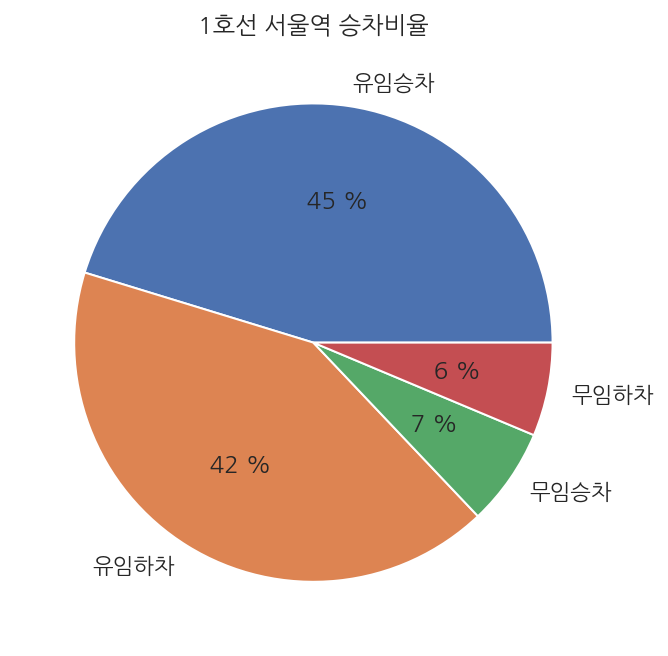

In [ ]:
plt.title('1호선 서울역 승차비율')
g = plt.pie(subway_seoul_sum, labels=labels, autopct='% 1.f %%')

In [ ]:
time = pd.read_csv('/content/drive/MyDrive/데이터파일/subwaytime.csv',encoding='cp949')

In [ ]:
time.head()

,사용월,호선명,역ID,지하철역,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,07:00:00~07:59:59,Unnamed: 11,08:00:00~08:59:59,Unnamed: 13,09:00:00~09:59:59,Unnamed: 15,10:00:00~10:59:59,Unnamed: 17,11:00:00~11:59:59,Unnamed: 19,12:00:00~12:59:59,Unnamed: 21,13:00:00~13:59:59,Unnamed: 23,14:00:00~14:59:59,Unnamed: 25,15:00:00~15:59:59,Unnamed: 27,16:00:00~16:59:59,Unnamed: 29,17:00:00~17:59:59,Unnamed: 31,18:00:00~18:59:59,Unnamed: 33,19:00:00~19:59:59,Unnamed: 35,20:00:00~20:59:59,Unnamed: 37,21:00:00~21:59:59,Unnamed: 39,22:00:00~22:59:59,Unnamed: 41,23:00:00~23:59:59,Unnamed: 43,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51
0,NaN,NaN,NaN,NaN,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차
1,2019-01,1호선,150.0,서울역,927,22,10682,8774,13504,45545,39110,103863,80492,236747,61108,163026,68446,86198,89100,80051,98021,85869,101282,91792,86627,86386,113919,87211,118223,91594,161216,98032,249973,105075,142575,77807,97729,55056,96955,46680,70982,35481,33149,19442,3612,7167,0,410,0,0,0,0
2,2019-01,1호선,151.0,시청,74,0,2409,4049,3532,19241,7703,66876,9978,209349,12818,88793,16470,49343,22512,45645,26040,41405,34728,46800,40497,40429,51586,34787,54591,29029,80258,28534,170225,28331,76142,15634,57394,9141,58745,8204,38156,6345,14478,4079,981,1256,3,29,0,0,0,0
3,2019-01,1호선,152.0,종각,100,8,4409,5105,4593,26969,6733,104259,11028,300081,14563,167611,20165,80474,34617,76633,42088,71920,59893,75678,68149,62408,84211,57607,96197,55889,144446,63459,257735,83206,134259,51603,113555,19039,135586,12188,111743,8286,54264,5560,4886,1722,0,0,0,0,0,0
4,2019-01,1호선,153.0,종로3가,122,4,5061,2520,3876,12832,6066,29381,9735,84155,14261,100477,24063,87040,42723,96552,58902,101213,76615,103649,81392,88983,94128,72249,105094,61092,107194,56484,129847,62455,95225,37346,68613,14242,76067,10422,62004,7761,25970,5503,3214,2471,0,52,0,0,0,0


In [ ]:

time.columns = ['사용월', '호선명', '역ID', '지하철역', '04시 승차', '04시 하차',
       '05시 승차', '05시 하차', '06시 승차', '05시 승차',
       '07:00:00~07:59:59', 'Unnamed: 11', '08:00:00~08:59:59', 'Unnamed: 13',
       '09:00:00~09:59:59', 'Unnamed: 15', '10:00:00~10:59:59', 'Unnamed: 17',
       '11:00:00~11:59:59', 'Unnamed: 19', '12:00:00~12:59:59', 'Unnamed: 21',
       '13:00:00~13:59:59', 'Unnamed: 23', '14:00:00~14:59:59', 'Unnamed: 25',
       '15:00:00~15:59:59', 'Unnamed: 27', '16:00:00~16:59:59', 'Unnamed: 29',
       '17:00:00~17:59:59', 'Unnamed: 31', '18:00:00~18:59:59', 'Unnamed: 33',
       '19:00:00~19:59:59', 'Unnamed: 35', '20:00:00~20:59:59', 'Unnamed: 37',
       '21:00:00~21:59:59', 'Unnamed: 39', '22:00:00~22:59:59', 'Unnamed: 41',
       '23:00:00~23:59:59', 'Unnamed: 43', '00:00:00~00:59:59', 'Unnamed: 45',
       '01:00:00~01:59:59', 'Unnamed: 47', '02:00:00~02:59:59', 'Unnamed: 49',
       '03:00:00~03:59:59', 'Unnamed: 51']

In [ ]:
time.loc[:, time.columns.str.contains('^Unnamed')]

,Unnamed: 5,Unnamed: 7,Unnamed: 9,Unnamed: 11,Unnamed: 13,Unnamed: 15,Unnamed: 17,Unnamed: 19,Unnamed: 21,Unnamed: 23,Unnamed: 25,Unnamed: 27,Unnamed: 29,Unnamed: 31,Unnamed: 33,Unnamed: 35,Unnamed: 37,Unnamed: 39,Unnamed: 41,Unnamed: 43,Unnamed: 45,Unnamed: 47,Unnamed: 49,Unnamed: 51
0,하차,하차,하차,하차,하차,하차,하차,하차,하차,하차,하차,하차,하차,하차,하차,하차,하차,하차,하차,하차,하차,하차,하차,하차
1,22,8774,45545,103863,236747,163026,86198,80051,85869,91792,86386,87211,91594,98032,105075,77807,55056,46680,35481,19442,7167,410,0,0
2,0,4049,19241,66876,209349,88793,49343,45645,41405,46800,40429,34787,29029,28534,28331,15634,9141,8204,6345,4079,1256,29,0,0
3,8,5105,26969,104259,300081,167611,80474,76633,71920,75678,62408,57607,55889,63459,83206,51603,19039,12188,8286,5560,1722,0,0,0
4,4,2520,12832,29381,84155,100477,87040,96552,101213,103649,88983,72249,61092,56484,62455,37346,14242,10422,7761,5503,2471,52,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,3,561,2270,3613,7142,5573,4994,4640,5777,6365,7272,8610,10490,12716,19016,18482,11747,10684,9988,6536,1940,0,0,0
595,0,625,1809,2999,5144,4131,3439,3646,4800,5392,5671,7268,8350,9159,13516,12582,7761,6912,6250,3595,1133,0,0,0
596,0,281,931,3424,8021,6949,6527,6282,7306,8423,7993,8141,8293,9810,12496,9495,4863,4105,3293,2152,662,0,0,0
597,0,190,928,2159,5117,3447,2362,2317,2564,2562,2548,2993,3068,3611,4235,3100,2037,2087,1872,1179,456,1,0,0


In [ ]:
time = time.drop([0])

In [ ]:
time.head()

,사용월,호선명,역ID,지하철역,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,07:00:00~07:59:59,Unnamed: 11,08:00:00~08:59:59,Unnamed: 13,09:00:00~09:59:59,Unnamed: 15,10:00:00~10:59:59,Unnamed: 17,11:00:00~11:59:59,Unnamed: 19,12:00:00~12:59:59,Unnamed: 21,13:00:00~13:59:59,Unnamed: 23,14:00:00~14:59:59,Unnamed: 25,15:00:00~15:59:59,Unnamed: 27,16:00:00~16:59:59,Unnamed: 29,17:00:00~17:59:59,Unnamed: 31,18:00:00~18:59:59,Unnamed: 33,19:00:00~19:59:59,Unnamed: 35,20:00:00~20:59:59,Unnamed: 37,21:00:00~21:59:59,Unnamed: 39,22:00:00~22:59:59,Unnamed: 41,23:00:00~23:59:59,Unnamed: 43,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51
1,2019-01,1호선,150.0,서울역,927,22,10682,8774,13504,45545,39110,103863,80492,236747,61108,163026,68446,86198,89100,80051,98021,85869,101282,91792,86627,86386,113919,87211,118223,91594,161216,98032,249973,105075,142575,77807,97729,55056,96955,46680,70982,35481,33149,19442,3612,7167,0,410,0,0,0,0
2,2019-01,1호선,151.0,시청,74,0,2409,4049,3532,19241,7703,66876,9978,209349,12818,88793,16470,49343,22512,45645,26040,41405,34728,46800,40497,40429,51586,34787,54591,29029,80258,28534,170225,28331,76142,15634,57394,9141,58745,8204,38156,6345,14478,4079,981,1256,3,29,0,0,0,0
3,2019-01,1호선,152.0,종각,100,8,4409,5105,4593,26969,6733,104259,11028,300081,14563,167611,20165,80474,34617,76633,42088,71920,59893,75678,68149,62408,84211,57607,96197,55889,144446,63459,257735,83206,134259,51603,113555,19039,135586,12188,111743,8286,54264,5560,4886,1722,0,0,0,0,0,0
4,2019-01,1호선,153.0,종로3가,122,4,5061,2520,3876,12832,6066,29381,9735,84155,14261,100477,24063,87040,42723,96552,58902,101213,76615,103649,81392,88983,94128,72249,105094,61092,107194,56484,129847,62455,95225,37346,68613,14242,76067,10422,62004,7761,25970,5503,3214,2471,0,52,0,0,0,0
5,2019-01,1호선,154.0,종로5가,43,2,1934,3590,2935,14991,5143,40376,8509,132808,12652,78635,20434,62671,31918,69919,45533,72651,60255,69005,69651,63201,74447,54752,77646,48878,93779,42973,133826,40675,72550,24744,49690,10816,40800,7410,32727,5112,12013,3450,785,980,1,3,0,0,0,0


In [ ]:
time2 = time.iloc[:,:14].copy()

In [ ]:
time2.columns = ['사용월', '호선명', '역ID', '지하철역', '4시승차', '4시하차',
       '5시승차', '5시하차', '6시승차', '6시하차',
       '7시승차', '7시하차', '8시승차',"8시하차"]

In [ ]:
time2["사용월"] = time2["사용월"].apply(lambda x: x[5:]).astype('int')

In [ ]:
time2.head()

,사용월,호선명,역ID,지하철역,4시승차,4시하차,5시승차,5시하차,6시승차,6시하차,7시승차,7시하차,8시승차,8시하차
1,1,1호선,150.0,서울역,927,22,10682,8774,13504,45545,39110,103863,80492,236747
2,1,1호선,151.0,시청,74,0,2409,4049,3532,19241,7703,66876,9978,209349
3,1,1호선,152.0,종각,100,8,4409,5105,4593,26969,6733,104259,11028,300081
4,1,1호선,153.0,종로3가,122,4,5061,2520,3876,12832,6066,29381,9735,84155
5,1,1호선,154.0,종로5가,43,2,1934,3590,2935,14991,5143,40376,8509,132808


In [ ]:
num = time2.columns[4:]
num

Index(['4시승차', '4시하차', '5시승차', '5시하차', '6시승차', '6시하차', '7시승차', '7시하차', '8시승차',
       '8시하차'],
      dtype='object')

In [ ]:
df.head()